In [16]:
# !pip install seaborn

In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_theme(style="whitegrid")

# Load dataset
print("1. Memuat dataset lengkap...")
try:
    df_full = pd.read_csv('../data/dataset_final.csv')
    print(f"   ✅ Berhasil! Total ada {len(df_full):,} baris data.")
except FileNotFoundError:
    print("   ❌ GAGAL! File 'dataset_final.csv' tidak ditemukan di folder 'data/'. Periksa kembali path Anda.")
    # Hentikan eksekusi jika file tidak ada
    exit()

1. Memuat dataset lengkap...
   ✅ Berhasil! Total ada 24,592 baris data.


In [19]:
# Membuat sampel
print("\n2. Mengambil 30% sampel acak untuk analisis...")
df_sample = df_full.sample(frac=0.3, random_state=42)
print(f"   ✅ Berhasil! Sampel data berisi {len(df_sample):,} baris.")


2. Mengambil 30% sampel acak untuk analisis...
   ✅ Berhasil! Sampel data berisi 7,378 baris.


In [20]:
# !pip install tabulate

In [21]:
# Menampilkan informasi dataset sampel
print("\n3. Melakukan inspeksi awal pada sampel data...")
print("   Struktur dan tipe data (df_sample.info()):")
df_sample.info()

print("\n   Preview 5 baris pertama data sampel (df_sample.head()):")
print(df_sample.head().to_markdown())


3. Melakukan inspeksi awal pada sampel data...
   Struktur dan tipe data (df_sample.info()):
<class 'pandas.core.frame.DataFrame'>
Index: 7378 entries, 963 to 4900
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           7378 non-null   object
 1   judul         7378 non-null   object
 2   tanggal       7378 non-null   object
 3   isi_berita    7378 non-null   object
 4   Narasi        7378 non-null   object
 5   Clean Narasi  7378 non-null   object
 6   hoax          7378 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 461.1+ KB

   Preview 5 baris pertama data sampel (df_sample.head()):
|       | url                                                                                                                                | judul                                                                             | tanggal                      | isi_berita                                             


4. Menganalisis distribusi label (Fakta vs Hoaks)...


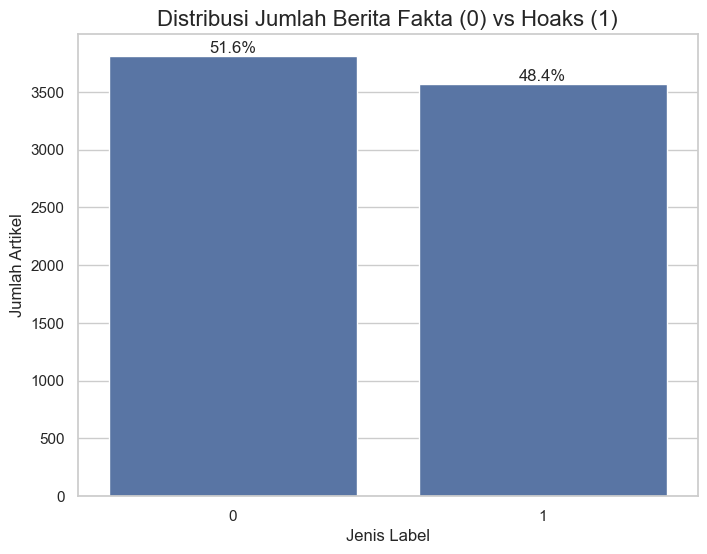


   Distribusi label dalam angka:
hoax
0    3808
1    3570
Name: count, dtype: int64


In [22]:
print("\n4. Menganalisis distribusi label (Fakta vs Hoaks)...")
# Membuat plot distribusi data
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='hoax', data=df_sample)
plt.title('Distribusi Jumlah Berita Fakta (0) vs Hoaks (1)', fontsize=16)
plt.xlabel('Jenis Label', fontsize=12)
plt.ylabel('Jumlah Artikel', fontsize=12)

# Membuat persentase
total = len(df_sample)
for p in plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
    
plt.show()

# Menampilkan angka pastinya 
print("\n   Distribusi label dalam angka:")
print(df_sample['hoax'].value_counts())


5. Menganalisis karakteristik teks berita...


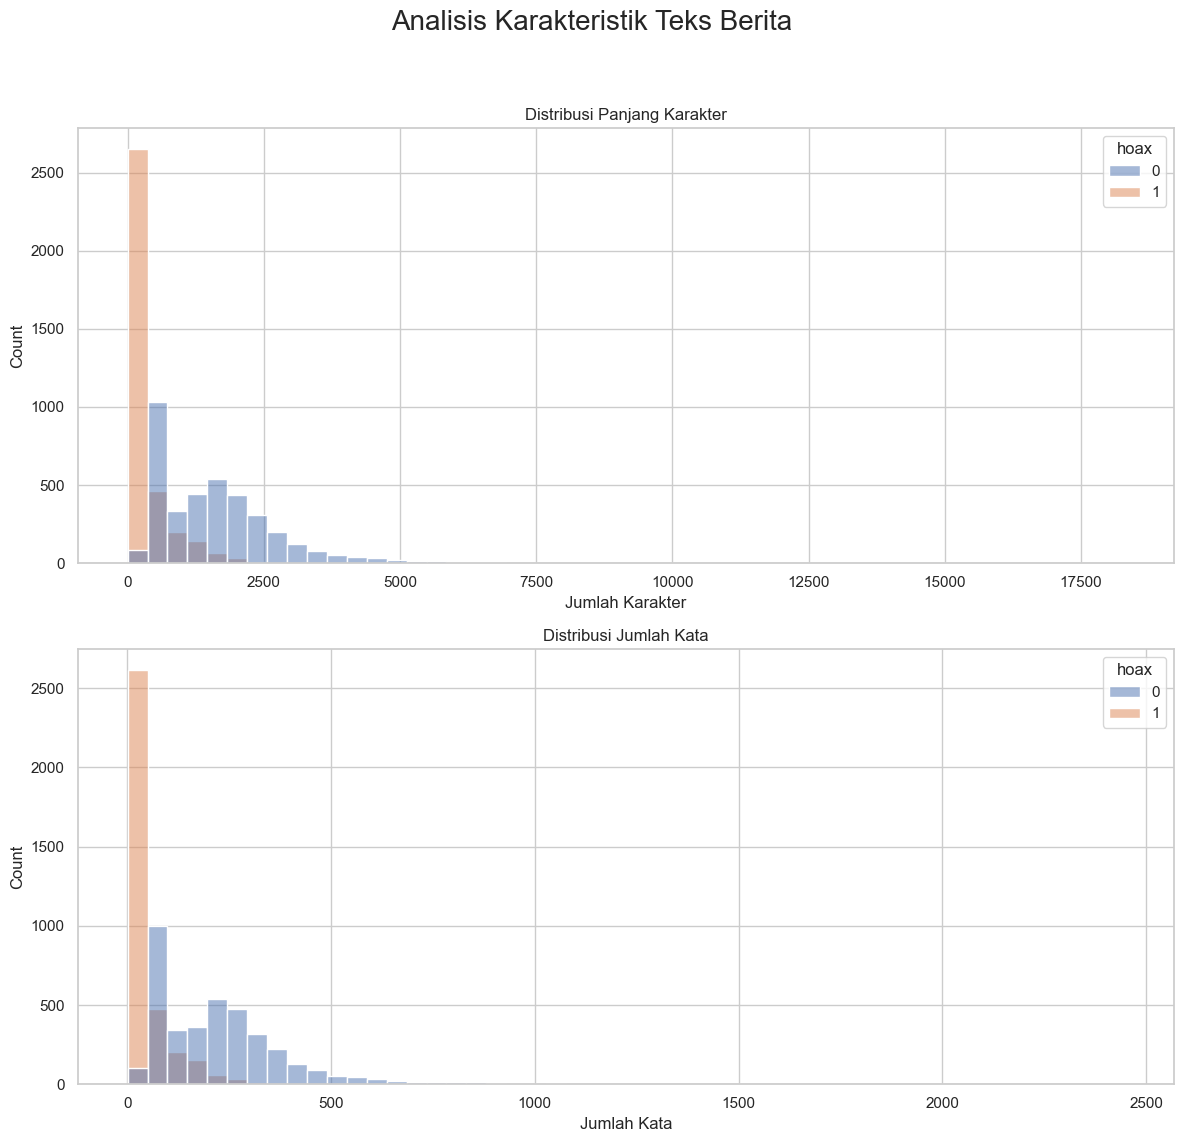


   Statistik Deskriptif berdasarkan Jumlah Kata:
       count        mean         std  min   25%    50%    75%     max
hoax                                                                 
0     3808.0  227.680672  173.748465  4.0  89.0  206.0  300.0  2446.0
1     3570.0   47.713445   62.363669  1.0  14.0   24.0   54.0  1357.0


In [23]:
print("\n5. Menganalisis karakteristik teks berita...")

# Membuat kolom panjang karakter dan jumlah kata
df_sample['panjang_teks'] = df_sample['Clean Narasi'].astype(str).str.len()
df_sample['jumlah_kata'] = df_sample['Clean Narasi'].astype(str).str.split().str.len()

# Membuat plot panjang karakter dan jumlah kata 
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Analisis Karakteristik Teks Berita', fontsize=20)

# Plot untuk panjang karakter
sns.histplot(ax=axes[0], data=df_sample, x='panjang_teks', hue='hoax', multiple='layer', bins=50)
axes[0].set_title('Distribusi Panjang Karakter')
axes[0].set_xlabel('Jumlah Karakter')

# Plot untuk jumlah kata 
sns.histplot(ax=axes[1], data=df_sample, x='jumlah_kata', hue='hoax', multiple='layer', bins=50)
axes[1].set_title('Distribusi Jumlah Kata')
axes[1].set_xlabel('Jumlah Kata')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Menampilkan hasil statistik deksriptif
print("\n   Statistik Deskriptif berdasarkan Jumlah Kata:")
print(df_sample.groupby('hoax')['jumlah_kata'].describe())